In [1]:
import torch
import torchvision
from torchvision.models.detection import ssd300_vgg16
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
from PIL import Image

# 모델 로드 (사전 학습된 모델 사용)
model = ssd300_vgg16(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 116MB/s]


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [4]:
import requests
from io import BytesIO

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# 이미지 전처리
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((300, 300)),
    torchvision.transforms.ToTensor()
])

img_tensor = transform(img).unsqueeze(0)

In [5]:
# 객체 탐지 수행
with torch.no_grad():
    predictions = model(img_tensor)

# 결과 확인
print(predictions)

[{'boxes': tensor([[1.6127e+02, 1.7527e+01, 2.9596e+02, 2.4216e+02],
        [6.1937e+00, 3.9249e+01, 1.5846e+02, 2.8717e+02],
        [5.7680e+00, 6.2706e+00, 2.8476e+02, 3.0000e+02],
        [2.0269e+01, 4.4086e+01, 8.8013e+01, 7.4737e+01],
        [0.0000e+00, 4.8904e+00, 2.9046e+02, 3.0000e+02],
        [0.0000e+00, 1.2921e+01, 2.9626e+02, 3.0000e+02],
        [6.5087e+01, 1.4673e+01, 2.5044e+02, 1.9996e+02],
        [1.5315e+01, 4.3467e+01, 8.6455e+01, 7.4067e+01],
        [3.9490e+00, 3.0669e+01, 1.6146e+02, 2.9128e+02],
        [1.2734e+02, 1.0123e+02, 3.0000e+02, 2.9216e+02],
        [1.5696e+02, 6.9171e-01, 2.9985e+02, 5.3625e+01],
        [7.4787e+00, 1.2353e+02, 9.1157e+01, 2.9509e+02],
        [2.3565e+02, 0.0000e+00, 3.0000e+02, 9.0696e+01],
        [2.7019e+00, 0.0000e+00, 2.8969e+02, 7.8505e+01],
        [1.6715e+02, 1.3125e+01, 2.9896e+02, 9.5376e+01],
        [2.3379e+02, 4.5890e+01, 3.0000e+02, 3.0000e+02],
        [2.1824e-01, 1.3504e+02, 1.2551e+02, 2.1856e+02],
   

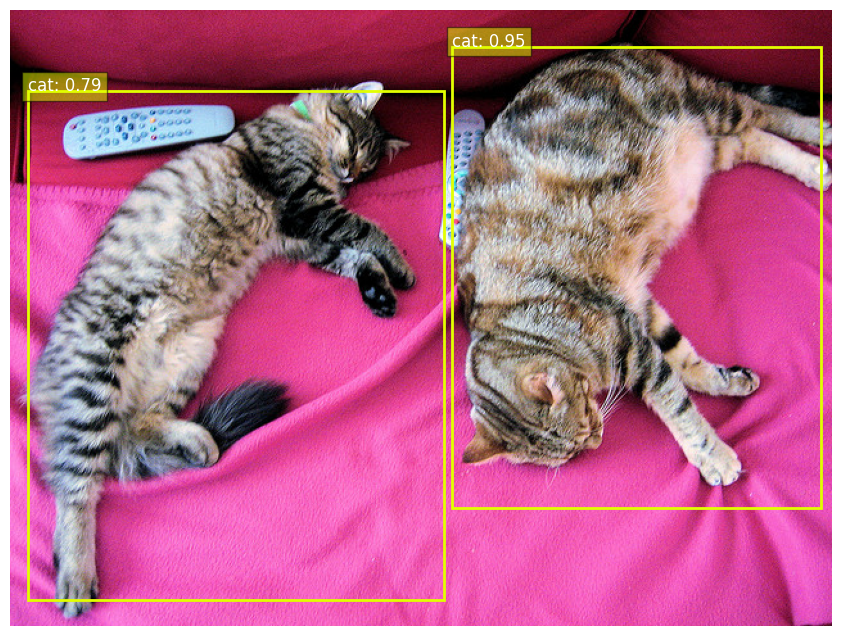

In [7]:
# COCO 클래스 이름 로드
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
    'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# 탐지 결과 시각화
def plot_results(pil_img, predictions, threshold=0.5):
    plt.figure(figsize=(12, 8))
    plt.imshow(pil_img)
    ax = plt.gca()

    colors = plt.cm.hsv(torch.linspace(0, 1, len(COCO_INSTANCE_CATEGORY_NAMES))).tolist()

    boxes = predictions[0]['boxes']
    scores = predictions[0]['scores']
    labels = predictions[0]['labels']

    width, height = pil_img.size

    for box, score, label in zip(boxes, scores, labels):
        if score >= threshold:
            xmin, ymin, xmax, ymax = box
            xmin = xmin * width / 300
            ymin = ymin * height / 300
            xmax = xmax * width / 300
            ymax = ymax * height / 300

            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                       fill=False, color=colors[label], linewidth=2))
            text = f'{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}'
            ax.text(xmin, ymin, text, bbox=dict(facecolor=colors[label], alpha=0.5), fontsize=12, color='white')

    plt.axis('off')
    plt.show()

# 결과 시각화
plot_results(img, predictions)